<a href="https://colab.research.google.com/github/Rizkyepk/Machine_Learning-Course/blob/main/Mid_test/MidTest_Random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Rizky Eka Putra Kusnady

NIM : 1103204195

Dataset : Credit score classification

model : random forest



In [1]:
# Import library Google Colab untuk mengakses Google Drive
from google.colab import drive

# Mount (pasang) Google Drive pada direktori /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset info

- ID: Unique identifier for each entry in the dataset.
- Customer_ID: Identifier for each customer.
- Month: Month of data collection.
- Name: Name of the customer.
- Age: Age of the customer.
- SSN: Social Security Number of the customer.
- Occupation: Occupation of the customer.
- Annual_Income: Annual income of the customer.
- Monthly_Inhand_Salary: Monthly salary after deductions.
- Num_Bank_Accounts: Number of bank accounts the customer has.
- Num_Credit_Card: Number of credit cards the customer has.
- Interest_Rate: Interest rate applied on loans.
- Num_of_Loan: Number of loans the customer has.
- Type_of_Loan: Type of loan taken by the customer.
- Delay_from_due_date: Number of days delayed from due date for payments.
- Num_of_Delayed_Payment: Number of delayed payments made by the customer.
- Changed_Credit_Limit: Indicates if the credit limit has been changed.
- Num_Credit_Inquiries: Number of credit inquiries made by the customer.
- Credit_Mix: Mix of different types of credit accounts held by the customer.
- Outstanding_Debt: Amount of outstanding debt.
- Credit_Utilization_Ratio: Ratio of credit used to credit available.
- Credit_History_Age: Age of credit history.
- Payment_of_Min_Amount: Indicates if minimum payment amount is met.
- Total_EMI_per_month: Total Equated Monthly Installment (EMI) paid by the customer.
- Amount_invested_monthly: Amount invested monthly by the customer.
- Payment_Behaviour: Payment behavior of the customer.
- Monthly_Balance: Monthly balance in the account.
- Credit_Score: Target variable - credit score of the customer.

In [2]:
import pandas as pd

# Adjust the file path accordingly
train = '/content/drive/MyDrive/Dataset_ML/Credit score classification/train.csv'

# Read the dataset into a DataFrame
df_train = pd.read_csv(train)
# df_test = pd.read_csv(train, dtype={'Column26': str})

# Display the first few rows of the DataFrame
df_train.head()

<ipython-input-2-ca8514a43da7>:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(train)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# EDA


In [3]:
# Display basic information about the DataFrame
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

setelah dilakukan dilakukan pengecekan silang terdapat datatype yang salah sehingga harus diubah.

In [4]:
# Daftar kolom yang perlu diubah menjadi float
columns_to_convert = ['Age', 'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit',
                      'Outstanding_Debt', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
                      'Amount_invested_monthly', 'Monthly_Balance', 'Payment_of_Min_Amount']

# Fungsi untuk mengonversi kolom-kolom tertentu menjadi float
def convert_to_float(df, columns):
    for column in columns:
        if column in df.columns:
            df[column] = pd.to_numeric(df[column], errors='coerce').astype(float)

# Mengonversi kolom-kolom tertentu menjadi float pada kedua file
convert_to_float(df_train, columns_to_convert)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [5]:
# Display summary statistics for numerical columns
df_train.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,95061.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,0.0,100000.000000,91216.000000,98791.000000
mean,110.934505,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,NaN,1403.118217,195.539456,402.551258
std,689.407864,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,NaN,8306.041270,199.564527,213.925499
min,-500.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,0.007760
25%,24.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,NaN,30.306660,72.236692,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,NaN,69.249473,128.954538,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,NaN,161.224249,236.815814,470.262938
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,NaN,82331.000000,1977.326102,1602.040519


In [6]:
# Check for missing values in each column
df_train.isnull().sum()

ID                               0
Customer_ID                      0
Month                            0
Name                          9985
Age                           4939
SSN                              0
Occupation                       0
Annual_Income                 6980
Monthly_Inhand_Salary        15002
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                   4785
Type_of_Loan                 11408
Delay_from_due_date              0
Num_of_Delayed_Payment        9746
Changed_Credit_Limit          2091
Num_Credit_Inquiries          1965
Credit_Mix                       0
Outstanding_Debt              1009
Credit_Utilization_Ratio         0
Credit_History_Age            9030
Payment_of_Min_Amount       100000
Total_EMI_per_month              0
Amount_invested_monthly       8784
Payment_Behaviour                0
Monthly_Balance               1209
Credit_Score                     0
dtype: int64

In [7]:
# Check for missing values in each column
rows_with_null = df_train[df_train.isnull().any(axis=1)]

# Menampilkan baris yang memiliki nilai null
rows_with_null

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,NaN,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,NaN,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,NaN,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,NaN,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,NaN,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,NaN,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,NaN,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,NaN,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,NaN,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard


In [8]:
# Mengubah nilai null menjadi 0 dalam DataFrame train
df_train.fillna(0, inplace=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [9]:
df_train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [10]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,0.0,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.944960,0,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [11]:
df_train.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,0.0,35.104023,60.971333,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,0.0,35.104023,54.185950,High_spent_Medium_value_payments,496.651610,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,0.0,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,0.0,35.104023,251.672582,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25.0,078-73-5990,Mechanic,0.00,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,0.0,35.104023,167.163865,!@9#%8,393.673696,Poor


In [12]:
# Untuk menghilangkan nilai '!@9#%8' pada kolom Payment_Behaviour
df_train = df_train[df_train['Payment_Behaviour'] != '!@9#%8']

# Untuk menghilangkan nilai '_______' pada kolom Occupation
df_traintrain = df_train[df_train['Occupation'] != '_______']

# Untuk menghasilkan dataframe baru pada Credit_Mix yang tidak ada nilai '_'
df_train = df_train[df_train['Credit_Mix'] != '_']

df_train.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.944960,0,0.0,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,28.609352,22 Years and 3 Months,0.0,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,0.000000,3,...,Good,809.98,31.377862,22 Years and 4 Months,0.0,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,0.0,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,0.0,49.574949,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,0x1609,CUS_0xd40,August,0,23.0,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,0,0.0,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,0.0,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,0.0,18.816215,104.291825,Low_spent_Small_value_payments,470.690627,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,0.0,18.816215,40.391238,High_spent_Large_value_payments,484.591214,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,0.000000,2,...,Good,605.03,39.182656,26 Years and 10 Months,0.0,18.816215,99.306228,Low_spent_Medium_value_payments,465.676224,Good
12,0x1612,CUS_0x21b1,May,Rick Rothackerj,28.0,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,0.0,18.816215,130.115420,Low_spent_Small_value_payments,444.867032,Good


In [13]:
# Dropping Columns (daftar yang ingin di drop)
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

# Perintah drop columns tersebut
df_train.drop(columns=columns_to_drop, inplace=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73709 entries, 1 to 99998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       73709 non-null  float64
 1   Occupation                73709 non-null  object 
 2   Annual_Income             73709 non-null  float64
 3   Num_Bank_Accounts         73709 non-null  int64  
 4   Num_Credit_Card           73709 non-null  int64  
 5   Interest_Rate             73709 non-null  int64  
 6   Num_of_Loan               73709 non-null  float64
 7   Delay_from_due_date       73709 non-null  int64  
 8   Num_of_Delayed_Payment    73709 non-null  float64
 9   Changed_Credit_Limit      73709 non-null  float64
 10  Num_Credit_Inquiries      73709 non-null  float64
 11  Credit_Mix                73709 non-null  object 
 12  Outstanding_Debt          73709 non-null  float64
 13  Credit_Utilization_Ratio  73709 non-null  float64
 14  Payment_of_

<ipython-input-13-ef23258e9378>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=columns_to_drop, inplace=True)


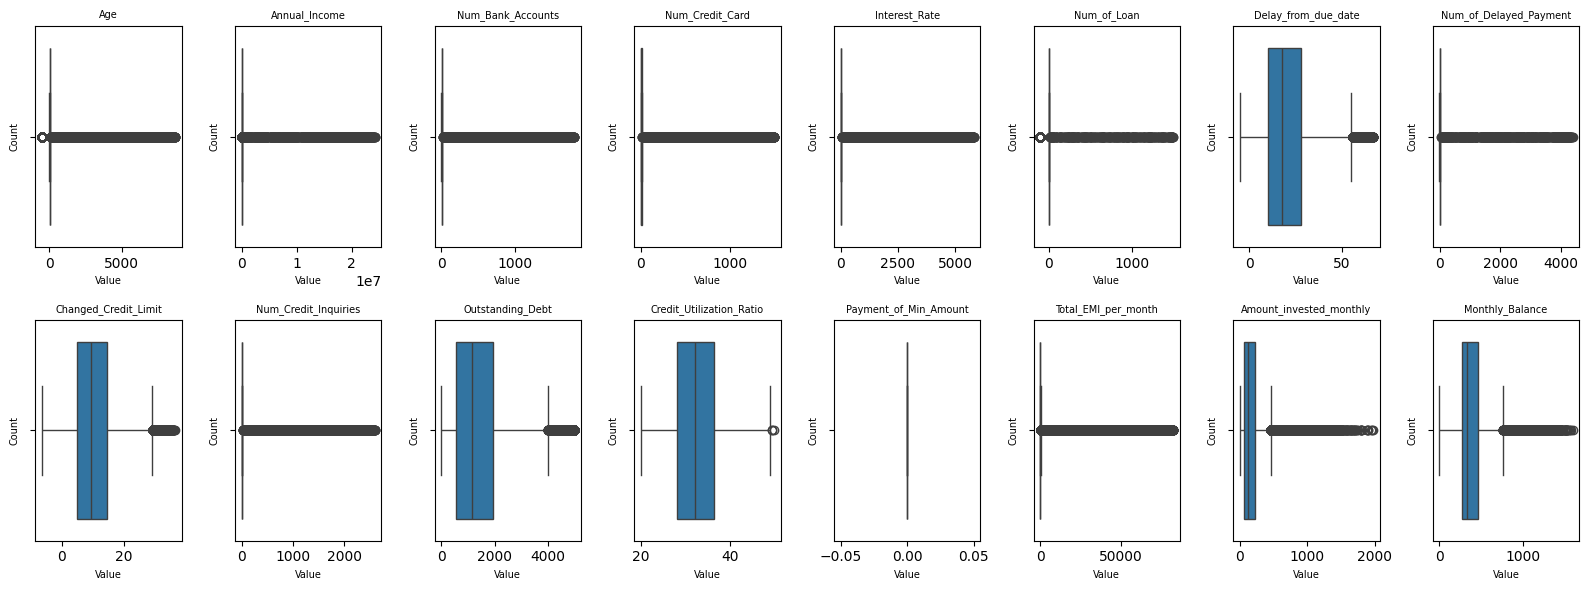

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df_train.select_dtypes(include=['int64', 'float64']).columns

# Jumlah kolom yang ingin ditampilkan
num_columns = 8

# Jumlah baris yang ditampilkan sesuai dengan jumlah kolom yang ditentukan
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

# Ukuran subplot
fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

# Loop untuk membuat boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

# Sembunyikan subplot yang tidak digunakan
for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

# Tata ulang tata letak plot
plt.tight_layout()

# Tampilkan Plot
plt.show()

# Pre Prosessing


In [15]:
# Mengganti nilai "_______" dengan NaN di seluruh DataFrame
df_train.replace("_______", pd.NA, inplace=True)

# Menghapus baris yang memiliki nilai NaN
df_train.dropna(inplace=True)

<ipython-input-21-49681a7dcee1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=Refined_Data_Set, palette='rainbow', order=Refined_Data_Set['Age_Group'].value_counts().index)


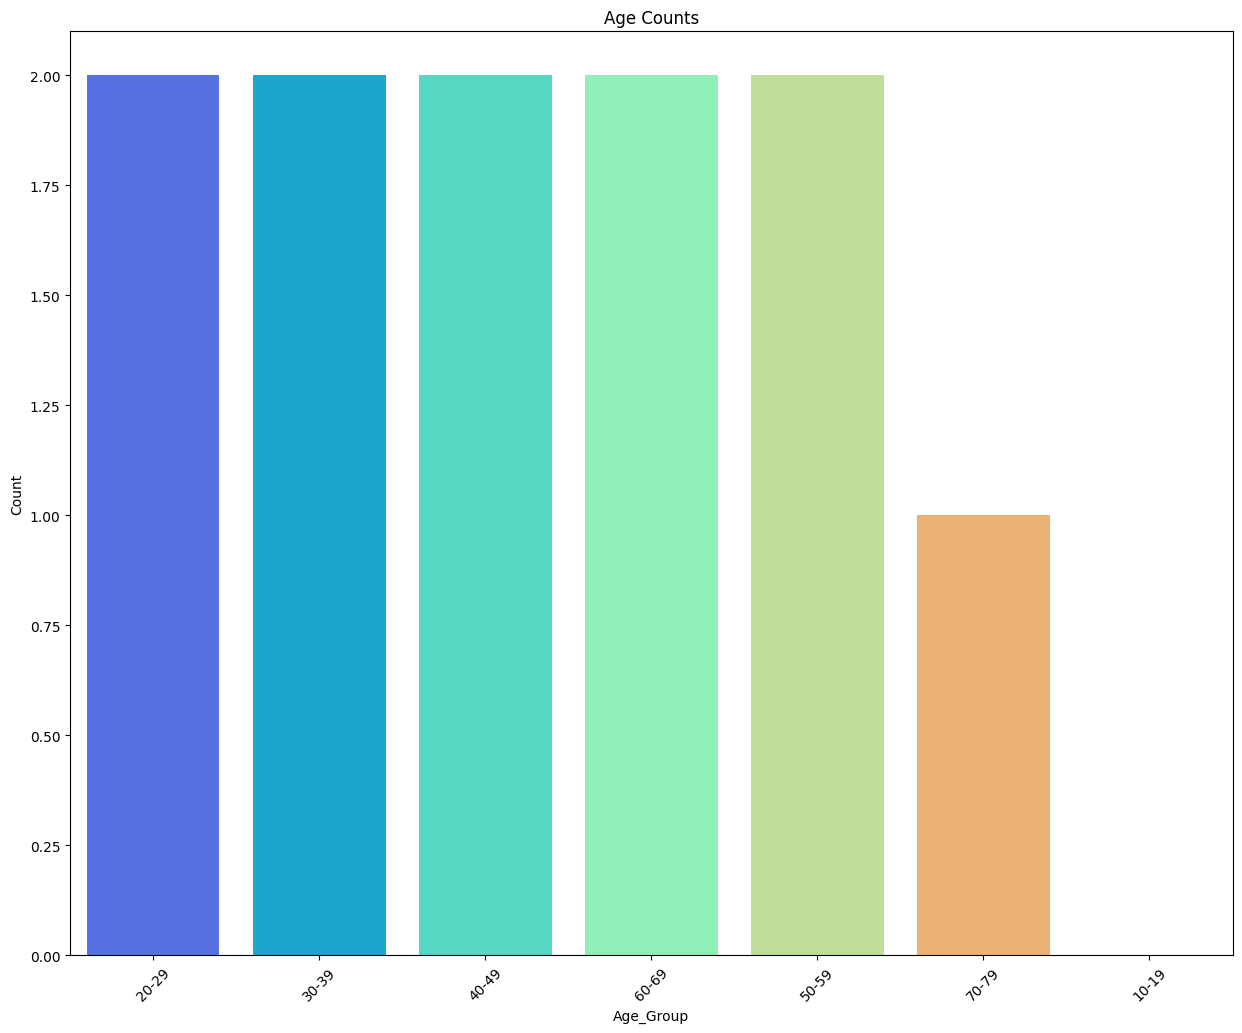

In [21]:
# Membuat DataFrame contoh (gantilah dengan data sesungguhnya Anda)
Refined_Data_Set = pd.DataFrame({
    'Age': [25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0]
})

# Membagi usia menjadi kelompok-kelompok
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
Refined_Data_Set['Age_Group'] = pd.cut(Refined_Data_Set['Age'], bins=bins, labels=labels)

# Membuat plot jumlah pengamatan dalam setiap grup usia
plt.figure(figsize=(15, 12))
sns.countplot(x='Age_Group', data=Refined_Data_Set, palette='rainbow', order=Refined_Data_Set['Age_Group'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.title('Age Counts')

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Memilih hanya kolom-kolom numerik untuk fitur
X = df_train.select_dtypes(include=['int64', 'float64'])

# Memilih target
y = df_train['Payment_Behaviour']

In [18]:
# Membagi data menjadi data latih dan data uji (75% data latih, 25% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Inisialisasi model Random Forest dengan 16 pohon dan 5 atribut yang dipertimbangkan pada setiap split
model = RandomForestClassifier(n_estimators=16, max_features=5, random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred = model.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4786239925242378


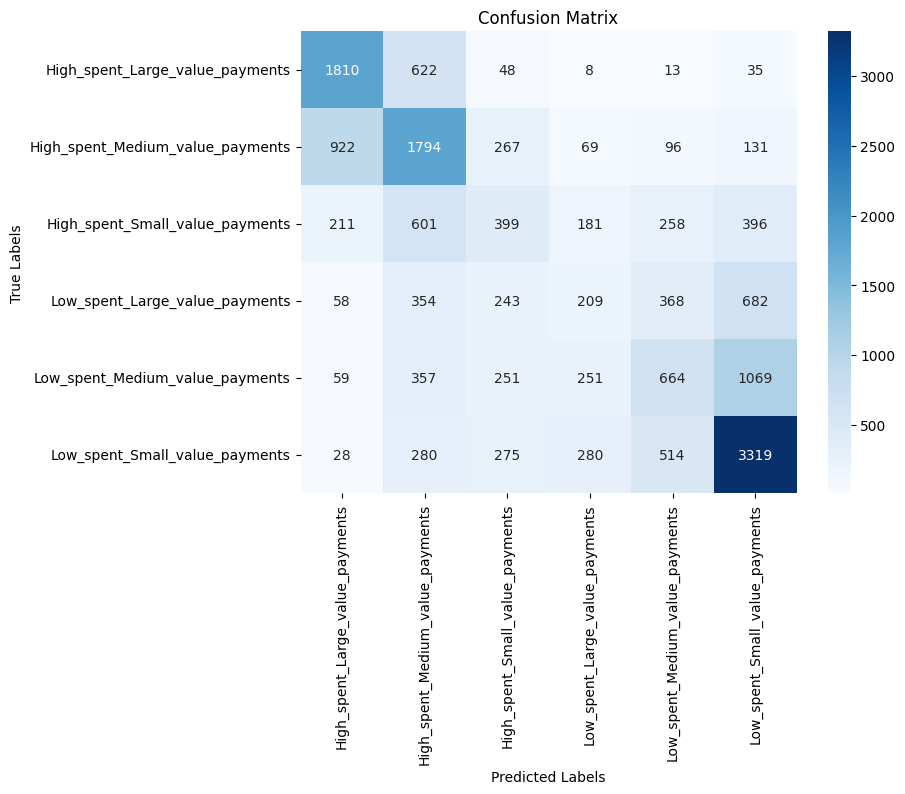


Classification Report:
                                  precision    recall  f1-score   support

 High_spent_Large_value_payments       0.59      0.71      0.64      2536
High_spent_Medium_value_payments       0.45      0.55      0.49      3279
 High_spent_Small_value_payments       0.27      0.20      0.23      2046
  Low_spent_Large_value_payments       0.21      0.11      0.14      1914
 Low_spent_Medium_value_payments       0.35      0.25      0.29      2651
  Low_spent_Small_value_payments       0.59      0.71      0.64      4696

                        accuracy                           0.48     17122
                       macro avg       0.41      0.42      0.41     17122
                    weighted avg       0.44      0.48      0.45     17122



In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Menampilkan evaluasi model menggunakan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [20]:
from sklearn.metrics import accuracy_score

# Menentukan nilai hyperparameter yang ingin diuji
n_estimators = [100, 200, 300]
max_depth = [None, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

best_accuracy = 0
best_params = {}

# Looping untuk mencoba kombinasi nilai hyperparameter
for n_estimator in n_estimators:
    for depth in max_depth:
        for split in min_samples_split:
            for leaf in min_samples_leaf:
                # Inisialisasi model Random Forest dengan nilai hyperparameter tertentu
                rf = RandomForestClassifier(n_estimators=n_estimator, max_depth=depth,
                                             min_samples_split=split, min_samples_leaf=leaf, random_state=42)
                # Melatih model pada data latih
                rf.fit(X_train, y_train)
                # Memprediksi kelas target untuk data uji
                y_pred = rf.predict(X_test)
                # Menghitung akurasi prediksi
                accuracy = accuracy_score(y_test, y_pred)
                # Menyimpan hyperparameter dengan akurasi terbaik
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'n_estimators': n_estimator, 'max_depth': depth,
                                   'min_samples_split': split, 'min_samples_leaf': leaf}

# Menggunakan model dengan hyperparameter terbaik
best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'],
                                 min_samples_split=best_params['min_samples_split'],
                                 min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
# Melatih model pada data latih
best_rf.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred = best_rf.predict(X_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 2}
Accuracy: 0.5124401354981895
